In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
keys1= Station.__table__.columns.keys()
keys2 = Measurement.__table__.columns.keys()
print(keys1)
print(keys2)

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']
['id', 'station', 'date', 'prcp', 'tobs']


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
connection = engine.connect()

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc())[0]
print(f"most recent date is: {recent_date}")

most recent date is: ('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year = timedelta(days=365)
one_year_date = dt.date(2017,8,23) - year
print(f"the Date one year from last recorded date is: {one_year_date}")


the Date one year from last recorded date is: 2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
percp = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()
percp_df = pd.DataFrame(percp)
percp_df.head()


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
percp_df = percp_df.set_index("date")
percp_df = percp_df.dropna(how="any")

# Sort the dataframe by date
percp_df = percp_df.sort_values("date")
percp_df.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


Text(0.5, 0, 'date')

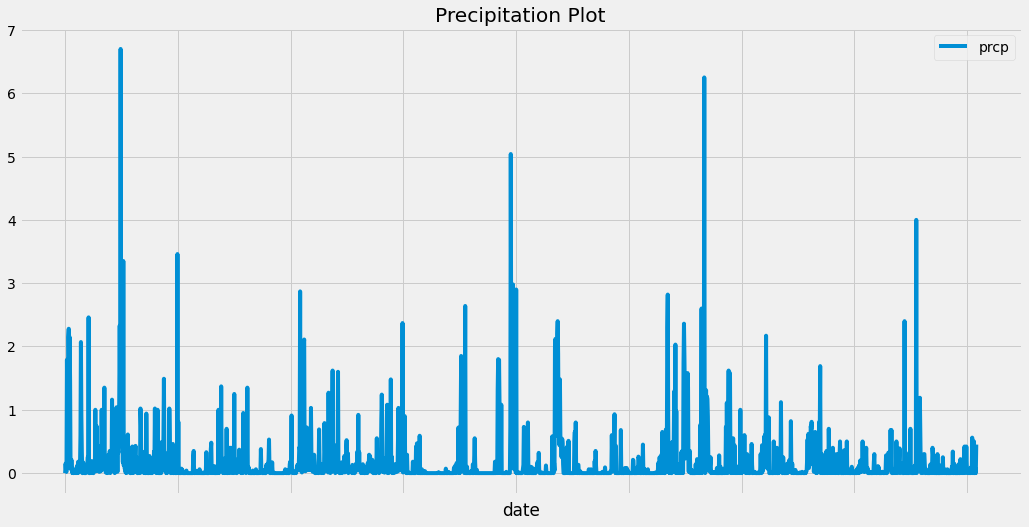

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = percp_df.plot(figsize=(16,8))
plt.title('Precipitation Plot')
ax.set_xticklabels(" ")
ax.set_xlabel("date")

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
nb_station = session.query(Station).count()
print("Total Number of Stations in the Dataset is:", nb_station)

Total Number of Stations in the Dataset is: 9


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
act_stat = session.query(Measurement.station, Measurement.tobs)
act_stat_df = pd.DataFrame(act_stat).groupby("station").count().sort_values(by=["tobs"], ascending=False)
act_stat_df.head()

,tobs
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station281 = session.query(Measurement.station, Measurement.tobs).\
            filter(Measurement.station =="USC00519281")
station281 = pd.DataFrame(station281)
station281.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
year_station = session.query(Measurement.station, Measurement.tobs).\
    filter (Measurement.station == "USC00519281", Measurement.date > "2016-08-23")
year_temp = pd.DataFrame(year_station)
year_temp.head()


,station,tobs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0


Text(0.5, 0, 'temperature')

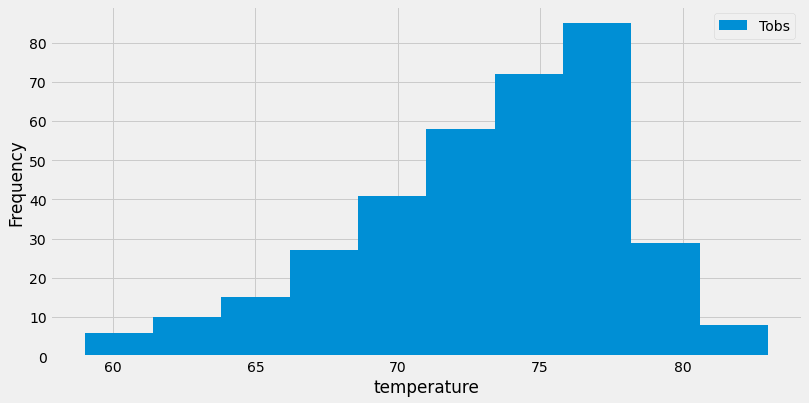

In [36]:
# and plot the results as a histogram
year_temp["tobs"].plot.hist(figsize=(12,6))
plt.legend(["Tobs"])
plt.xlabel("temperature")

# Close session

In [37]:
# Close Session
session.close()